In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For display
pd.set_option('display.max_columns', None)

## Read Data → PostgreSQL - (Prepare data for EDA)


In [3]:
patients_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\patients.csv')
sessions_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\sessions.csv')
feedback_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\feedback.csv')
clinics_df =pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\clinics.csv')
interventions_df =pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\interventions.csv')
drop_df = pd.read_csv(r'C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\raw\dropout_flags.csv')

## EDA → (Exploratory Data Analysis)

Steps in EDA
 - Data Exploration
    - Head()
    - info()
    - describe()
 - Data Cleaning 
    - Identifying & Handling Missing Values
    - Identifying & Handling Duplicates
 - Data Transformation (Feature Engineering)
   - Standardizing data types (text, date, replacing values)
   - Log Transform (for highly skewed data e.g., income, prices)
   - Binning (Convert continuous variables into categorical bins e.g., age ranges)
   - Encoding (Convert categorical variables into numerical format (e.g., One-Hot, Label Encoding))
 - Data Distributions
    - Histograms for distributions of numerical features (age, bmi etc)- Also to check if the features are normally distributed or skewed (e.g., pain level or age should be somewhat evenly distributed just like we discovered in the last drop-in session).
    - Boxplots to detect outliers & handle them.
    - Pairplots to visualize relationships between multiple features.
 -  Correlation Analysis (dentify relationships between variables that may help in predictive modeling)
    - Correlation Matrix to understand feature dependencies.
    - Heatmap for visual representation of correlations.
 - Understanding Dropout Behavior
    - investigate the correlation between features and patient dropout.



In [4]:
patients_df.head()

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44,Insurance,True,6,Public
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44,Insurance,False,3,Public
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44,GP,True,5,Public
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44,GP,True,2,Private-Premium
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44,Insurance,True,4,Private-Basic


# Inspection and Data Cleaning

In [5]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   gender           5000 non-null   object 
 3   bmi              5000 non-null   float64
 4   smoker           5000 non-null   bool   
 5   chronic_cond     1931 non-null   object 
 6   injury_type      5000 non-null   object 
 7   signup_date      5000 non-null   object 
 8   referral_source  5000 non-null   object 
 9   consent          5000 non-null   bool   
 10  clinic_id        5000 non-null   int64  
 11  insurance_type   5000 non-null   object 
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 400.5+ KB


There are some missing values in chronic_cond. Actually the missing values are those with no chronic disease

In [6]:
if pd.api.types.is_categorical_dtype(patients_df['chronic_cond']):
    patients_df['chronic_cond'] = patients_df['chronic_cond'].cat.add_categories(['No chronic'])

# Then, fill NaN values with "No chronic"
patients_df['chronic_cond'] = patients_df['chronic_cond'].fillna('No chronic')

In [7]:
# Check unique elements in each column and print them out
for column in patients_df.columns:
    unique_values = patients_df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'patient_id':
[   1    2    3 ... 4998 4999 5000]

Unique values in 'age':
[29 68 64 41 22 83 47 77 63 70 31 42 49 51 20 54 28 67 79 82 45 39 78 23
 71 30 26 40 33 55 62 81 73 60 24 38 69 74 43 37 34 27 18 65 36 48 56 25
 61 75 58 32 84 21 46 72 19 66 80 35 57 59 50 52 53 76 44]

Unique values in 'gender':
['Male' 'Female']

Unique values in 'bmi':
[23.9 31.7 27.5 26.1 21.3 19.4 29.5 27.3 18.1 32.6 28.9 22.  21.6 21.7
 23.1 25.4 24.4 23.  26.2 21.  23.8 24.7 28.2 21.9 25.3 26.  19.  21.5
 19.5 31.6 32.3 28.6 20.3 27.  24.5 20.7 25.1 18.7 30.4 22.6 26.8 23.2
 25.6 32.5 28.1 31.2 30.1 30.7 20.1 21.8 23.4 24.  22.8 23.7 22.9 25.5
 28.5 19.8 33.9 17.4 28.7 28.  20.6 29.4 26.3 26.5 29.9 24.8 27.9 25.7
 18.3 20.5 18.6 25.2 22.5 24.2 27.8 22.3 30.9 29.6 30.  23.3 22.2 24.3
 23.5 31.4 27.2 32.7 32.2 19.2 22.4 21.1 25.  33.8 26.9 26.4 29.  18.9
 17.9 26.6 27.1 30.8 29.7 26.7 20.2 30.2 23.6 20.  17.6 17.3 27.7 29.2
 25.8 22.7 24.1 28.4 25.9 27.4 31.3 31.8 30.5 32.4 29.3 31.1 34.

In [8]:
# Convert object columns to 'category' type
category_columns = ['consent', 'clinic_id','insurance_type','referral_source','injury_type',
                    'chronic_cond','smoker','gender']
for col in category_columns:
    patients_df[col] = patients_df[col].astype('category')

# Convert date columns to datetime
date_columns = ['signup_date']

for col in date_columns:
    patients_df[col] = pd.to_datetime(patients_df[col])

# Check the updated data types
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   patient_id       5000 non-null   int64         
 1   age              5000 non-null   int64         
 2   gender           5000 non-null   category      
 3   bmi              5000 non-null   float64       
 4   smoker           5000 non-null   category      
 5   chronic_cond     5000 non-null   category      
 6   injury_type      5000 non-null   category      
 7   signup_date      5000 non-null   datetime64[ns]
 8   referral_source  5000 non-null   category      
 9   consent          5000 non-null   category      
 10  clinic_id        5000 non-null   category      
 11  insurance_type   5000 non-null   category      
dtypes: category(8), datetime64[ns](1), float64(1), int64(2)
memory usage: 196.9 KB


In [9]:
#checking for duplicates
patients_df.duplicated().sum()

0

#### Binning (putting the age into categories)

In [10]:
import numpy as np
# Add age group column for segmentation
bins = [0, 18, 35, 55, np.inf]
labels = ['0-18', '19-35', '36-55', '55+']
patients_df['age_group'] = pd.cut(patients_df['age'], bins=bins, labels=labels)
patients_df.head(2)

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,age_group
0,1,29,Male,23.9,False,No chronic,Knee,2025-04-27 00:12:44,Insurance,True,6,Public,19-35
1,2,68,Female,31.7,True,No chronic,Shoulder,2024-11-28 00:12:44,Insurance,False,3,Public,55+


(Data Transformation)
- Log Transform (for highly skewed data e.g., income, prices)
- Encoding (Convert categorical variables into numerical format (e.g., One-Hot, Label Encoding))

In [11]:
patients_df.describe()

,patient_id,age,bmi,signup_date
count,5000.000000,5000.000000,5000.000000,5000
mean,2500.500000,50.907200,25.174580,2024-12-10 09:48:44
min,1.000000,18.000000,17.000000,2024-06-13 00:12:44
25%,1250.750000,34.000000,22.400000,2024-09-08 00:12:44
50%,2500.500000,51.000000,25.100000,2024-12-10 12:12:44
75%,3750.250000,68.000000,27.700000,2025-03-11 00:12:44
max,5000.000000,84.000000,38.800000,2025-06-12 00:12:44
std,1443.520003,19.403203,3.769633,NaN


Minimal level of skewness

# Data Distribution 

#### Boxplot for distributions of numerical features

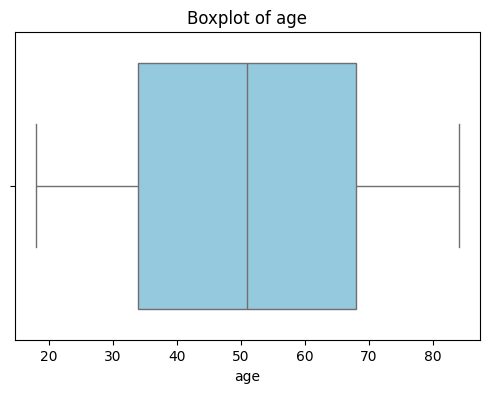

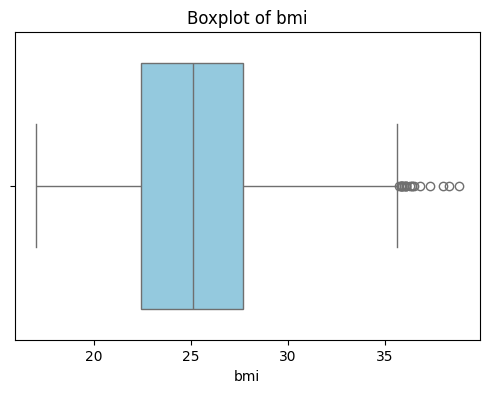

In [12]:
# List of numerical columns
numerical_cols = ['age', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=patients_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### (Data Distribution)
- Boxplots to detect outliers & handle them.
- Pairplots to visualize relationships between multiple features.

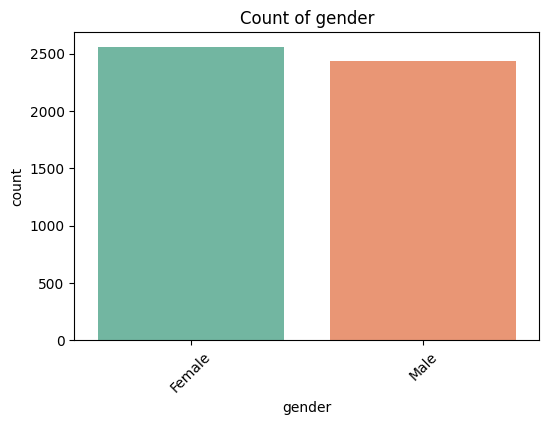

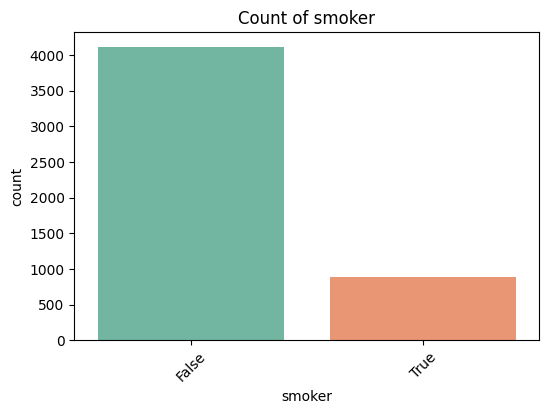

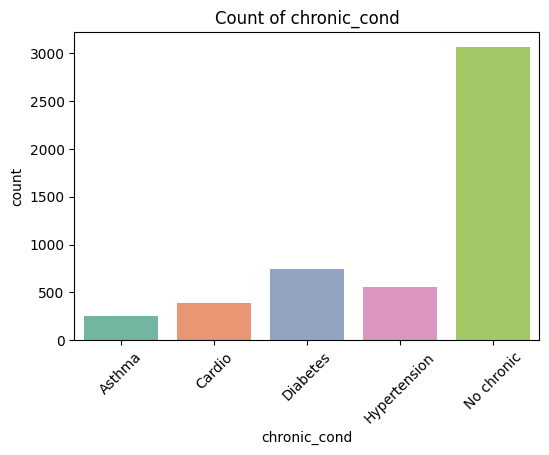

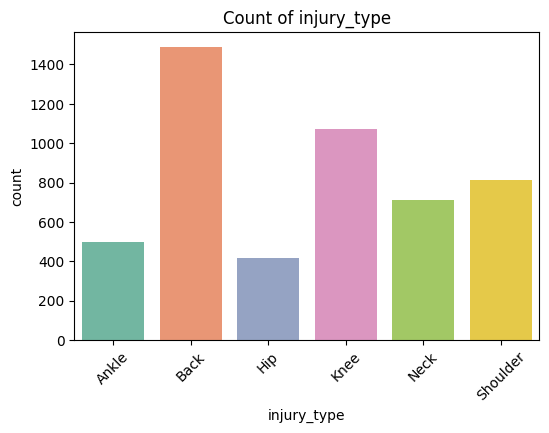

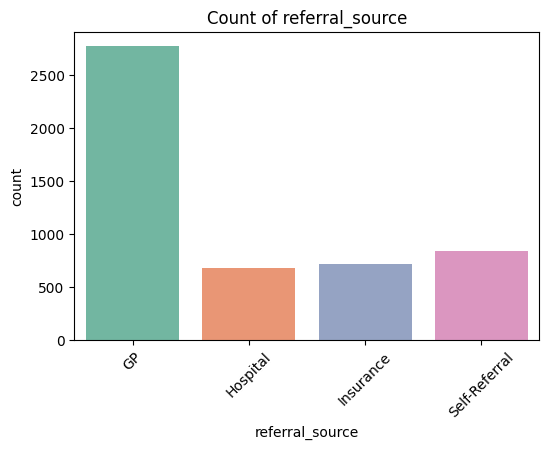

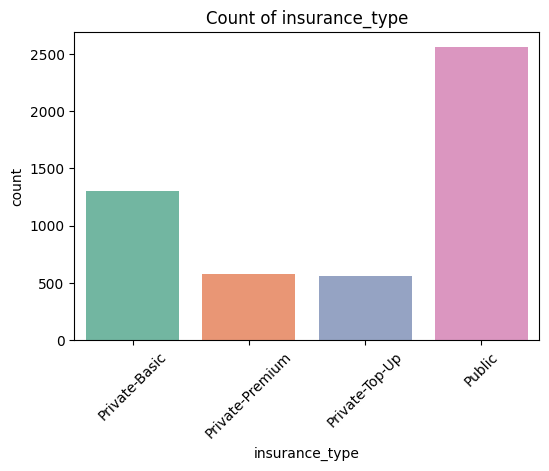

In [13]:
categorical_cols = ['gender', 'smoker', 'chronic_cond', 'injury_type', 'referral_source', 'insurance_type']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=patients_df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
'''import os

# Define path
save_path = r"C:\Users\GIDI\Desktop\Folders\REPOSITORY\medoptix-ai-internship\Datasets\processed_feature_engineering"
os.makedirs(save_path, exist_ok=True)

# Save DataFrame
patients_df.to_csv(os.path.join(save_path, "patients.csv"), index=False)'''
